## 损失函数为MSE

In [113]:
import  tensorflow as tf
from    tensorflow.keras import datasets, layers, optimizers, Sequential, metrics

In [114]:
# 设置GPU使用方式
# 获取GPU列表
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
    # 设置GPU为增长式占用
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True) 
    except RuntimeError as e:
        # 打印异常
        print(e)

In [3]:
(xs, ys),_ = datasets.mnist.load_data()
print('datasets:', xs.shape, ys.shape, xs.min(), xs.max())

batch_size = 32

xs = tf.convert_to_tensor(xs, dtype=tf.float32) / 255.
db = tf.data.Dataset.from_tensor_slices((xs,ys))
db = db.batch(batch_size).repeat(30)

datasets: (60000, 28, 28) (60000,) 0 255


In [116]:
model = Sequential([layers.Dense(256, activation='relu'), 
                     layers.Dense(128, activation='relu'),
                     layers.Dense(10)])
model.build(input_shape=(4, 28*28))
model.summary()

optimizer = optimizers.SGD(lr=0.01)
acc_meter = metrics.Accuracy()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             multiple                  200960    
_________________________________________________________________
dense_52 (Dense)             multiple                  32896     
_________________________________________________________________
dense_53 (Dense)             multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 耗时巨大
for step, (x,y) in enumerate(db):

    with tf.GradientTape() as tape:
        # 打平操作，[b, 28, 28] => [b, 784]
        x = tf.reshape(x, (-1, 28*28))
        # Step1. 得到模型输出output [b, 784] => [b, 10]
        out = model(x)
        # [b] => [b, 10]
        y_onehot = tf.one_hot(y, depth=10)
        # 计算差的平方和，[b, 10]
        loss = tf.square(out-y_onehot)
        # 计算每个样本的平均误差，[b]
        loss = tf.reduce_sum(loss) / x.shape[0]


    acc_meter.update_state(tf.argmax(out, axis=1), y)

    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))


    if step % 200==0:

        print(step, 'loss:', float(loss), 'acc:', acc_meter.result().numpy())
        acc_meter.reset_states()

0 loss: 1.7534599304199219 acc: 0.03125
200 loss: 0.44551974534988403 acc: 0.68671876
400 loss: 0.4234689176082611 acc: 0.84515625
600 loss: 0.33971071243286133 acc: 0.8634375
800 loss: 0.2810252010822296 acc: 0.8896875
1000 loss: 0.3286469876766205 acc: 0.8846875
1200 loss: 0.31151083111763 acc: 0.9060938
1400 loss: 0.2206282913684845 acc: 0.91625
1600 loss: 0.21076782047748566 acc: 0.9096875
1800 loss: 0.22187116742134094 acc: 0.9259375
2000 loss: 0.20213583111763 acc: 0.93828124
2200 loss: 0.1590643972158432 acc: 0.92515624
2400 loss: 0.25978991389274597 acc: 0.92625
2600 loss: 0.24126344919204712 acc: 0.9351562
2800 loss: 0.14984960854053497 acc: 0.93421876
3000 loss: 0.30067193508148193 acc: 0.9271875
3200 loss: 0.20468740165233612 acc: 0.93859375
3400 loss: 0.1560928225517273 acc: 0.93296874
3600 loss: 0.13243088126182556 acc: 0.9365625
3800 loss: 0.1819324791431427 acc: 0.9525
4000 loss: 0.18269990384578705 acc: 0.94953126
4200 loss: 0.1399674266576767 acc: 0.9375
4400 loss: 0.1

35400 loss: 0.1202152743935585 acc: 0.97859377
35600 loss: 0.03339654579758644 acc: 0.983125
35800 loss: 0.07228201627731323 acc: 0.9814063
36000 loss: 0.07519306987524033 acc: 0.9784375
36200 loss: 0.07043199241161346 acc: 0.9815625
36400 loss: 0.04598293453454971 acc: 0.9815625
36600 loss: 0.0376126691699028 acc: 0.97875
36800 loss: 0.024701204150915146 acc: 0.9795312
37000 loss: 0.03465190529823303 acc: 0.9792187
37200 loss: 0.20427921414375305 acc: 0.9764063
37400 loss: 0.09065641462802887 acc: 0.98078126
37600 loss: 0.08447228372097015 acc: 0.98375
37800 loss: 0.04050110653042793 acc: 0.9809375
38000 loss: 0.09670419991016388 acc: 0.9821875
38200 loss: 0.03540008142590523 acc: 0.9820312
38400 loss: 0.038014017045497894 acc: 0.979375
38600 loss: 0.06635181605815887 acc: 0.9817188
38800 loss: 0.08189349621534348 acc: 0.98078126
39000 loss: 0.08569719642400742 acc: 0.976875
39200 loss: 0.037264466285705566 acc: 0.9792187
39400 loss: 0.02761935070157051 acc: 0.9845312
39600 loss: 0.07

## 改损失函数为交叉熵 

In [46]:
from tqdm import tqdm_notebook
import IPython.display as display

In [3]:
import  tensorflow as tf
from    tensorflow.keras import datasets, layers, optimizers, Sequential, metrics

In [48]:
# 设置GPU使用方式
# 获取GPU列表
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
    # 设置GPU为增长式占用
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True) 
    except RuntimeError as e:
        # 打印异常
        print(e)

In [49]:
(xs, ys),_ = datasets.mnist.load_data()
print('datasets:', xs.shape, ys.shape, xs.min(), xs.max())

batch_size = 32

xs = tf.convert_to_tensor(xs, dtype=tf.float32) / 255.
db = tf.data.Dataset.from_tensor_slices((xs,ys))
db = db.batch(batch_size).repeat(30)

datasets: (60000, 28, 28) (60000,) 0 255


In [50]:
model = Sequential([layers.Dense(256, activation='relu'), 
                     layers.Dense(128, activation='relu'),
                     layers.Dense(10,activation='softmax')])
model.build(input_shape=(4, 28*28))
model.summary()

optimizer = optimizers.Adam()
acc_meter = metrics.SparseCategoricalAccuracy()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             multiple                  200960    
_________________________________________________________________
dense_16 (Dense)             multiple                  32896     
_________________________________________________________________
dense_17 (Dense)             multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [51]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

In [52]:
# 耗时巨大
iters=-1
bar=tqdm_notebook(db,ncols=600)
for (x,y) in bar:
    iters=iters+1
    with tf.GradientTape() as tape:
        # 打平操作，[b, 28, 28] => [b, 784]
        x = tf.reshape(x, (-1, 28*28))
        # Step1. 得到模型输出output [b, 784] => [b, 10]
        out = model(x)
        # [b] => [b, 10]
#         y_onehot = tf.one_hot(y, depth=10)
        # 计算差的平方和，[b, 10]
        loss = loss_object(y,out)
#         # 计算每个样本的平均误差，[b]
#         loss = tf.reduce_sum(loss) / x.shape[0]


    acc_meter.update_state(y,out)

    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))


    if iters % 200==0:
        bar.set_description("loss{0:.3f},acc{1:.3f}".format(float(loss),acc_meter.result().numpy()))
#         print(iters, 'loss:', float(loss), 'acc:', acc_meter.result().numpy())
        acc_meter.reset_states()

## 手写训练参数，损失函数为MSE

In [1]:
import  matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
# Default parameters for plots
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.titlesize'] = 20
matplotlib.rcParams['figure.figsize'] = [9, 7]
matplotlib.rcParams['font.family'] = ['STKaiTi']
matplotlib.rcParams['axes.unicode_minus']=False 

import  tensorflow as tf
from    tensorflow import keras
from    tensorflow.keras import datasets
import  os

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# x: [60k, 28, 28],
# y: [60k]
(x, y), _ = datasets.mnist.load_data()
# x: [0~255] => [0~1.]
x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.
y = tf.convert_to_tensor(y, dtype=tf.int32)

print(x.shape, y.shape, x.dtype, y.dtype)
print(tf.reduce_min(x), tf.reduce_max(x))
print(tf.reduce_min(y), tf.reduce_max(y))


train_db = tf.data.Dataset.from_tensor_slices((x,y)).batch(128)
train_iter = iter(train_db)
sample = next(train_iter)
print('batch:', sample[0].shape, sample[1].shape)


# [b, 784] => [b, 256] => [b, 128] => [b, 10]
# [dim_in, dim_out], [dim_out]
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))

lr = 1e-3

losses = []
acc_meter = tf.keras.metrics.SparseCategoricalAccuracy()

(60000, 28, 28) (60000,) <dtype: 'float32'> <dtype: 'int32'>
tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(9, shape=(), dtype=int32)
batch: (128, 28, 28) (128,)


In [4]:
for epoch in range(20): # iterate db for 10
    for step, (x, y) in enumerate(train_db): # for every batch
        # x:[128, 28, 28]
        # y: [128]

        # [b, 28, 28] => [b, 28*28]
        x = tf.reshape(x, [-1, 28*28])

        with tf.GradientTape() as tape: # tf.Variable
            # x: [b, 28*28]
            # h1 = x@w1 + b1
            # [b, 784]@[784, 256] + [256] => [b, 256] + [256] => [b, 256] + [b, 256]
            h1 = x@w1 + tf.broadcast_to(b1, [x.shape[0], 256])
            h1 = tf.nn.relu(h1)
            # [b, 256] => [b, 128]
            h2 = h1@w2 + b2
            h2 = tf.nn.relu(h2)
            # [b, 128] => [b, 10]
            out = h2@w3 + b3

            # compute loss
            # out: [b, 10]
            # y: [b] => [b, 10]
            y_onehot = tf.one_hot(y, depth=10)

            # mse = mean(sum(y-out)^2)
            # [b, 10]
            loss = tf.square(y_onehot - out)
            # mean: scalar
            loss = tf.reduce_mean(loss)

        # compute gradients
        grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])
        # print(grads)
        # w1 = w1 - lr * w1_grad
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])
        
        acc_meter.update_state(y,out)
        
        if step % 100 == 0:
            print(epoch, step, 'loss:', float(loss),' acc:',acc_meter.result().numpy())
            acc_meter.reset_states()
    losses.append(float(loss))

0 0 loss: 0.3248775005340576  acc: 0.1796875
0 100 loss: 0.28446534276008606  acc: 0.16335937
0 200 loss: 0.2835283577442169  acc: 0.16648437
0 300 loss: 0.24933362007141113  acc: 0.17023438
0 400 loss: 0.24124212563037872  acc: 0.16664062
1 0 loss: 0.236648827791214  acc: 0.16738637
1 100 loss: 0.2251092493534088  acc: 0.17734376
1 200 loss: 0.2283942699432373  acc: 0.17429687
1 300 loss: 0.20752520859241486  acc: 0.17742187
1 400 loss: 0.20413661003112793  acc: 0.17695312
2 0 loss: 0.2086954116821289  acc: 0.1790909
2 100 loss: 0.2058030664920807  acc: 0.18671875
2 200 loss: 0.20816676318645477  acc: 0.18703125
2 300 loss: 0.19088482856750488  acc: 0.1825
2 400 loss: 0.18938495218753815  acc: 0.1834375
3 0 loss: 0.19668853282928467  acc: 0.18647727
3 100 loss: 0.19711463153362274  acc: 0.19234376
3 200 loss: 0.19781233370304108  acc: 0.19171876
3 300 loss: 0.18211330473423004  acc: 0.18695313
3 400 loss: 0.18142621219158173  acc: 0.18804687
4 0 loss: 0.18957862257957458  acc: 0.18920

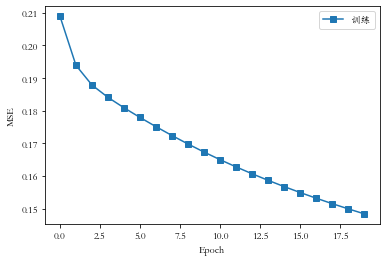

In [5]:
plt.figure()
plt.plot(losses, color='C0', marker='s', label='训练')
plt.xlabel('Epoch')
plt.legend()
plt.ylabel('MSE')
# plt.savefig('forward.svg')
plt.show()

## 手写训练参数，损失函数为交叉熵

In [65]:
import  matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
# Default parameters for plots
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.titlesize'] = 20
matplotlib.rcParams['figure.figsize'] = [9, 7]
matplotlib.rcParams['font.family'] = ['STKaiTi']
matplotlib.rcParams['axes.unicode_minus']=False 

import  tensorflow as tf
from    tensorflow import keras
from    tensorflow.keras import datasets
import  os

In [66]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# x: [60k, 28, 28],
# y: [60k]
(x, y), _ = datasets.mnist.load_data()
# x: [0~255] => [0~1.]
x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.
y = tf.convert_to_tensor(y, dtype=tf.int32)

print(x.shape, y.shape, x.dtype, y.dtype)
print(tf.reduce_min(x), tf.reduce_max(x))
print(tf.reduce_min(y), tf.reduce_max(y))


train_db = tf.data.Dataset.from_tensor_slices((x,y)).batch(128)
train_iter = iter(train_db)
sample = next(train_iter)
print('batch:', sample[0].shape, sample[1].shape)


# [b, 784] => [b, 256] => [b, 128] => [b, 10]
# [dim_in, dim_out], [dim_out]
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))

lr = 1e-3

losses = []
acc_meter = metrics.SparseCategoricalAccuracy()

(60000, 28, 28) (60000,) <dtype: 'float32'> <dtype: 'int32'>
tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(9, shape=(), dtype=int32)
batch: (128, 28, 28) (128,)


In [67]:
for epoch in range(20): # iterate db for 10
    for step, (x, y) in enumerate(train_db): # for every batch
        # x:[128, 28, 28]
        # y: [128]

        # [b, 28, 28] => [b, 28*28]
        x = tf.reshape(x, [-1, 28*28])

        with tf.GradientTape() as tape: # tf.Variable
            # x: [b, 28*28]
            # h1 = x@w1 + b1
            # [b, 784]@[784, 256] + [256] => [b, 256] + [256] => [b, 256] + [b, 256]
            h1 = x@w1 + tf.broadcast_to(b1, [x.shape[0], 256])
            h1 = tf.nn.relu(h1)
            # [b, 256] => [b, 128]
            h2 = h1@w2 + b2
            h2 = tf.nn.relu(h2)
            # [b, 128] => [b, 10]
            out = h2@w3 + b3
            out = tf.nn.softmax(out)
            # compute loss
            # out: [b, 10]
            # y: [b] => [b, 10]
#             y_onehot = tf.one_hot(y, depth=10)

            # mse = mean(sum(y-out)^2)
            # [b, 10]
            loss = loss_object(y,out)
            # mean: scalar
#             loss = tf.reduce_mean(loss)

        # compute gradients
        grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])
        # print(grads)
        # w1 = w1 - lr * w1_grad
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])
        
        acc_meter.update_state(y,out)
        
        if step % 100 == 0:
            print(epoch, step, 'loss:', float(loss),' acc:',acc_meter.result().numpy())
            acc_meter.reset_states()
    losses.append(float(loss))

0 0 loss: 2.311211585998535  acc: 0.6740909
0 100 loss: 2.273275852203369  acc: 0.15359375
0 200 loss: 2.116412878036499  acc: 0.22101563
0 300 loss: 2.0204038619995117  acc: 0.29179686
0 400 loss: 1.9008249044418335  acc: 0.37460938
1 0 loss: 1.830556869506836  acc: 0.45943183
1 100 loss: 1.8329212665557861  acc: 0.5071875
1 200 loss: 1.6500616073608398  acc: 0.53375
1 300 loss: 1.6206507682800293  acc: 0.5692969
1 400 loss: 1.528738260269165  acc: 0.5975781
2 0 loss: 1.4480079412460327  acc: 0.6514773
2 100 loss: 1.4876084327697754  acc: 0.65335935
2 200 loss: 1.2749314308166504  acc: 0.65398437
2 300 loss: 1.2831480503082275  acc: 0.6766406
2 400 loss: 1.2421772480010986  acc: 0.6892969
3 0 loss: 1.1509872674942017  acc: 0.73136365
3 100 loss: 1.2081576585769653  acc: 0.72632813
3 200 loss: 0.9985957145690918  acc: 0.71828127
3 300 loss: 1.0393104553222656  acc: 0.73695314
3 400 loss: 1.0432581901550293  acc: 0.74507815
4 0 loss: 0.9462477564811707  acc: 0.7846591
4 100 loss: 1.0039

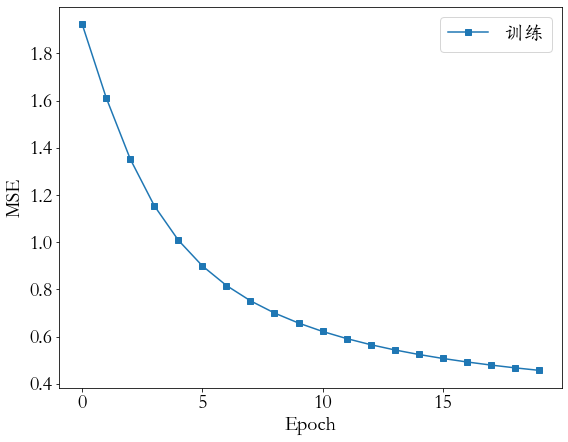

In [68]:
plt.figure()
plt.plot(losses, color='C0', marker='s', label='训练')
plt.xlabel('Epoch')
plt.legend()
plt.ylabel('MSE')
# plt.savefig('forward.svg')
plt.show()

## 调用库函数，损失函数为MSE

In [74]:
import  os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'


import  tensorflow as tf
from    tensorflow import keras
from    tensorflow.keras import layers, optimizers, datasets

In [75]:
(x, y), (x_val, y_val) = datasets.mnist.load_data() 
x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.
y = tf.convert_to_tensor(y, dtype=tf.int32)
# y = tf.one_hot(y, depth=10)
print(x.shape, y.shape)
train_dataset = tf.data.Dataset.from_tensor_slices((x, y))
train_dataset = train_dataset.batch(200)

(60000, 28, 28) (60000,)


In [81]:
model = keras.Sequential([ 
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10)])
optimizer = optimizers.SGD(learning_rate=0.001)
acc_meter = metrics.SparseCategoricalAccuracy()

In [82]:
def train_epoch(epoch):

    # Step4.loop
    for step, (x, y) in enumerate(train_dataset):


        with tf.GradientTape() as tape:
            # [b, 28, 28] => [b, 784]
            x = tf.reshape(x, (-1, 28*28))
            # Step1. compute output
            # [b, 784] => [b, 10]
            out = model(x)
            
            y_onehot = tf.one_hot(y, depth=10)
            
            # Step2. compute loss
            loss = tf.reduce_sum(tf.square(out - y_onehot)) / x.shape[0]

        # Step3. optimize and update w1, w2, w3, b1, b2, b3
        grads = tape.gradient(loss, model.trainable_variables)
        # w' = w - lr * grad
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        acc_meter.update_state(y,out)
        
        if step % 100 == 0:
            print(epoch, step, 'loss:', loss.numpy(),' acc:',acc_meter.result().numpy())
            acc_meter.reset_states()

In [83]:
for epoch in range(30):
    train_epoch(epoch)

0 0 loss: 1.8774716  acc: 0.075
0 100 loss: 0.9665799  acc: 0.1758
0 200 loss: 0.7579569  acc: 0.41275
1 0 loss: 0.6786789  acc: 0.5691
1 100 loss: 0.6868919  acc: 0.6414
1 200 loss: 0.5671677  acc: 0.68565
2 0 loss: 0.548317  acc: 0.73515
2 100 loss: 0.5926056  acc: 0.74545
2 200 loss: 0.4923066  acc: 0.76195
3 0 loss: 0.48660746  acc: 0.7928
3 100 loss: 0.54066175  acc: 0.7914
3 200 loss: 0.4489276  acc: 0.8011
4 0 loss: 0.4482039  acc: 0.82135
4 100 loss: 0.5052299  acc: 0.816
4 200 loss: 0.41827935  acc: 0.82205
5 0 loss: 0.42110932  acc: 0.8394
5 100 loss: 0.47841254  acc: 0.8339
5 200 loss: 0.39507523  acc: 0.83835
6 0 loss: 0.4000894  acc: 0.8539
6 100 loss: 0.4570197  acc: 0.84625
6 200 loss: 0.37625104  acc: 0.8495
7 0 loss: 0.38318336  acc: 0.8647
7 100 loss: 0.43926594  acc: 0.8556
7 200 loss: 0.36047664  acc: 0.859
8 0 loss: 0.3691645  acc: 0.87185
8 100 loss: 0.4242443  acc: 0.86345
8 200 loss: 0.3470456  acc: 0.8675
9 0 loss: 0.35727313  acc: 0.87875
9 100 loss: 0.4111853

## 调用库函数，损失函数为交叉熵

In [84]:
import  os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'


import  tensorflow as tf
from    tensorflow import keras
from    tensorflow.keras import layers, optimizers, datasets

In [85]:
(x, y), (x_val, y_val) = datasets.mnist.load_data() 
x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.
y = tf.convert_to_tensor(y, dtype=tf.int32)
# y = tf.one_hot(y, depth=10)
print(x.shape, y.shape)
train_dataset = tf.data.Dataset.from_tensor_slices((x, y))
train_dataset = train_dataset.batch(200)

(60000, 28, 28) (60000,)


In [86]:
model = keras.Sequential([ 
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10,activation='softmax')])
optimizer = optimizers.SGD(learning_rate=0.001)
acc_meter = metrics.SparseCategoricalAccuracy()

In [87]:
def train_epoch(epoch):

    # Step4.loop
    for step, (x, y) in enumerate(train_dataset):


        with tf.GradientTape() as tape:
            # [b, 28, 28] => [b, 784]
            x = tf.reshape(x, (-1, 28*28))
            # Step1. compute output
            # [b, 784] => [b, 10]
            out = model(x)
            
            # Step2. compute loss
            loss = loss_object(y,out)

        # Step3. optimize and update w1, w2, w3, b1, b2, b3
        grads = tape.gradient(loss, model.trainable_variables)
        # w' = w - lr * grad
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        acc_meter.update_state(y,out)
        
        if step % 100 == 0:
            print(epoch, step, 'loss:', loss.numpy(),' acc:',acc_meter.result().numpy())
            acc_meter.reset_states()

In [88]:
for epoch in range(30):
    train_epoch(epoch)

0 0 loss: 2.3235595  acc: 0.105
0 100 loss: 2.2804399  acc: 0.1387
0 200 loss: 2.1543093  acc: 0.22895
1 0 loss: 2.0839617  acc: 0.33835
1 100 loss: 2.0739968  acc: 0.4592
1 200 loss: 1.9301246  acc: 0.5425
2 0 loss: 1.8636914  acc: 0.60345
2 100 loss: 1.8756468  acc: 0.6399
2 200 loss: 1.7066371  acc: 0.66845
3 0 loss: 1.6440017  acc: 0.7026
3 100 loss: 1.6761326  acc: 0.7106
3 200 loss: 1.4868671  acc: 0.72385
4 0 loss: 1.436232  acc: 0.75025
4 100 loss: 1.4843764  acc: 0.7499
4 200 loss: 1.2864811  acc: 0.75865
5 0 loss: 1.2541988  acc: 0.78105
5 100 loss: 1.314904  acc: 0.77745
5 200 loss: 1.1158532  acc: 0.78435
6 0 loss: 1.103311  acc: 0.80475
6 100 loss: 1.1727614  acc: 0.79925
6 200 loss: 0.9767914  acc: 0.80435
7 0 loss: 0.9817762  acc: 0.8225
7 100 loss: 1.0569634  acc: 0.8147
7 200 loss: 0.8657117  acc: 0.81895
8 0 loss: 0.88548654  acc: 0.83425
8 100 loss: 0.9640691  acc: 0.82745
8 200 loss: 0.7780563  acc: 0.83005
9 0 loss: 0.8088976  acc: 0.8438
9 100 loss: 0.8893556  acc

## 彩蛋

In [96]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow

import tensorflow as tf

In [97]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [98]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [99]:
model.fit(x_train, y_train, epochs=5,verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 - 5s - loss: 0.2045 - accuracy: 0.9387
Epoch 2/5
60000/60000 - 5s - loss: 0.0858 - accuracy: 0.9729
Epoch 3/5
60000/60000 - 5s - loss: 0.0590 - accuracy: 0.9813
Epoch 4/5
60000/60000 - 4s - loss: 0.0448 - accuracy: 0.9854
Epoch 5/5
60000/60000 - 4s - loss: 0.0356 - accuracy: 0.9884
